In [1]:
import sys
import os

# TODO: this is a hack, change this for editable install
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.functions import *

from src.loss import cross_entropy_loss

In [2]:
def generate_dededup(model_name: str, n_samples: int, max_len: int = 10) -> int:
    X, _ = generateAndEncodeData(model_name, max_len, n_samples, removeDuplicates=True)
    return len(X)

Generating for reverse...


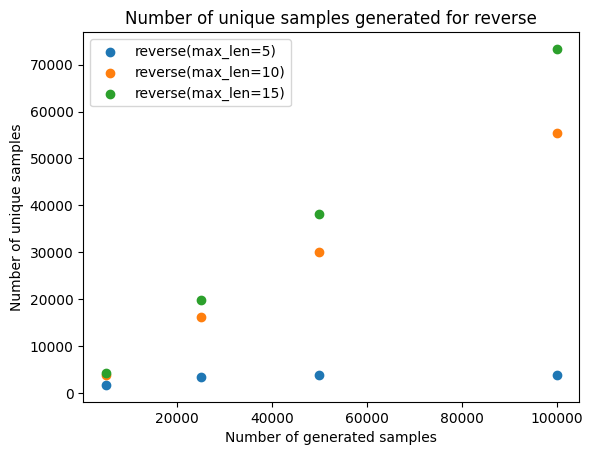

Generating for hist...


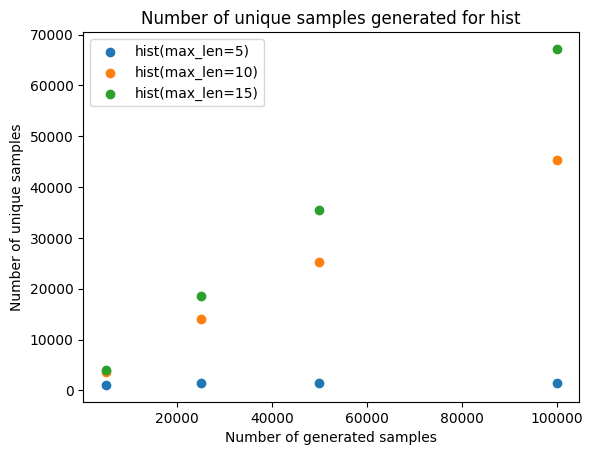

Generating for sort...


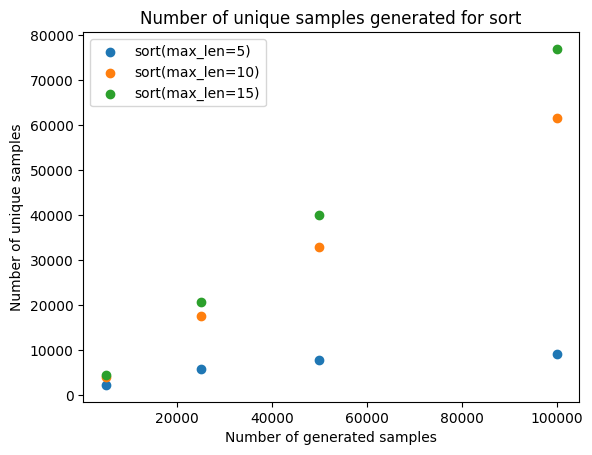

Generating for most-freq...


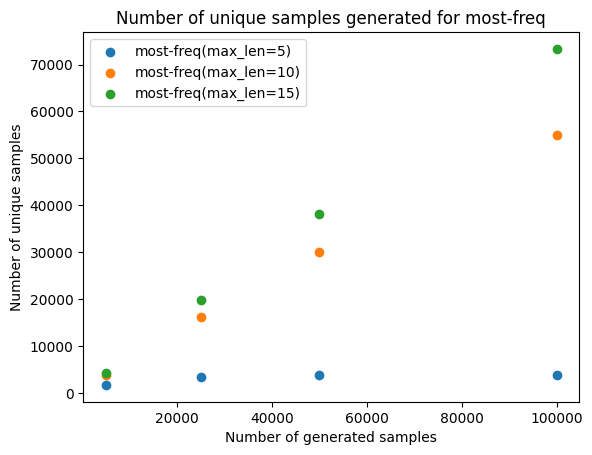

Generating for shuffle_dyck1...


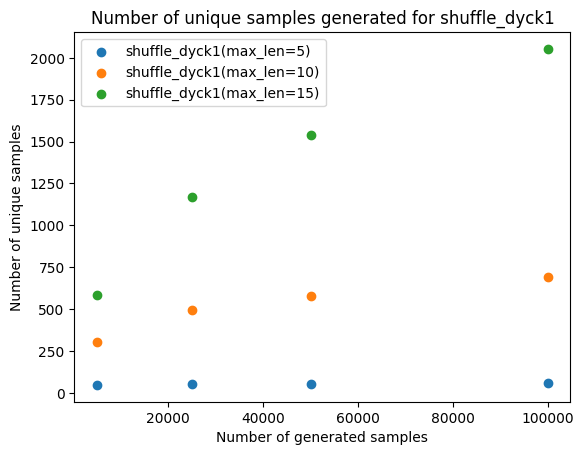

Generating for shuffle_dyck2...


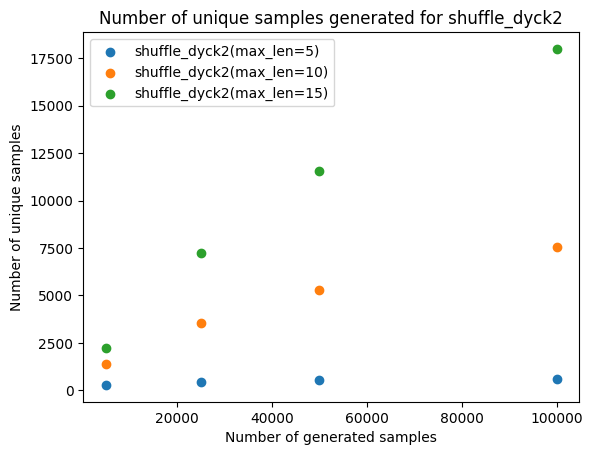

In [3]:
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed

def generate_samples(model_name, n_samples, max_len):
    return n_samples, max_len, generate_dededup(model_name, n_samples, max_len)

for model_name in getAcceptedNamesAndInput().keys():
    print(f"Generating for {model_name}...")
    with ThreadPoolExecutor() as executor:
        futures = []
        for max_len in [5, 10, 15]:
            for n_samples in [5000, 25000, 50000, 100000]:
                futures.append(executor.submit(generate_samples, model_name, n_samples, max_len))

        X = {max_len: [] for max_len in [5, 10, 15]}
        Y = {max_len: [] for max_len in [5, 10, 15]}
        for future in as_completed(futures):
            n_samples, max_len, result = future.result()
            X[max_len].append(n_samples)
            Y[max_len].append(result)

        for max_len in [5, 10, 15]:
            plt.scatter(X[max_len], Y[max_len], label=f"{model_name}(max_len={max_len})")

    plt.xlabel("Number of generated samples")
    plt.ylabel("Number of unique samples")
    plt.title(f"Number of unique samples generated for {model_name}")
    plt.legend()
    plt.show()

In [ ]:
def test_n_samples_function(model_name: str, n_samples, max_len: int = 10, n_epochs: int = 50000, batch_size: int = 256, learning_rate: float = 1e-04, output_dir: str = None):
    model = generateModel(model_name, max_len)
    model.setRandomWeights()
    X, Y = generateAndEncodeData(model_name, max_len, n_samples, removeDuplicates=True)

    X_train = X[:int(0.85*len(X))]
    Y_train = Y[:int(0.85*len(Y))]
    X_val = X[int(0.85*len(X)):]
    Y_val = Y[int(0.85*len(Y)):]

    return model.train(X_train,Y_train, n_epochs, batch_size, learning_rate, False, X_val, Y_val, 0, 10, loss_fn=cross_entropy_loss, output_dir=output_dir)

In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def run_test(model_name, n_samples):
    print(f"Testing {model_name} with {n_samples} samples...")
    metrics, validation = test_n_samples_function(model_name, n_samples, output_dir=f"saved_data/{model_name}/{n_samples}/")
    return model_name, n_samples, metrics, validation

max_workers = 5
with ThreadPoolExecutor(max_workers=max_workers) as executor:
    futures = []
    for model_name in getAcceptedNamesAndInput().keys():
        print(f"Testing {model_name}...")
        for n_samples in [5000, 10000, 25000, 50000, 100000]:
            future = executor.submit(run_test, model_name, n_samples)
            futures.append(future)

    for future in as_completed(futures):
        model_name, n_samples, metrics, validation = future.result()
        print(f"Completed {model_name} with {n_samples} samples")

In [2]:
def load_results(model_name: str, n_samples: int):
    metrics = np.load(f"saved_data/{model_name}/{n_samples}/metrics.npy", allow_pickle=True)
    validation = np.load(f"saved_data/{model_name}/{n_samples}/validations.npy", allow_pickle=True)
    return metrics, validation

def plot_metrics(metrics):
    plt.plot([m["step"] for m in metrics], [m["loss"] for m in metrics])
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

def plot_validation(validations):
    plt.plot(np.linspace(0, 50000, len(validations)), [m for m in validations])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Validation Accuracy")
    plt.show()

def plot_results(model_name: str, n_samples: int):
    metrics, validation = load_results(model_name, n_samples)
    plot_metrics(metrics)
    plot_validation(validation)

Plotting reverse with 5000...


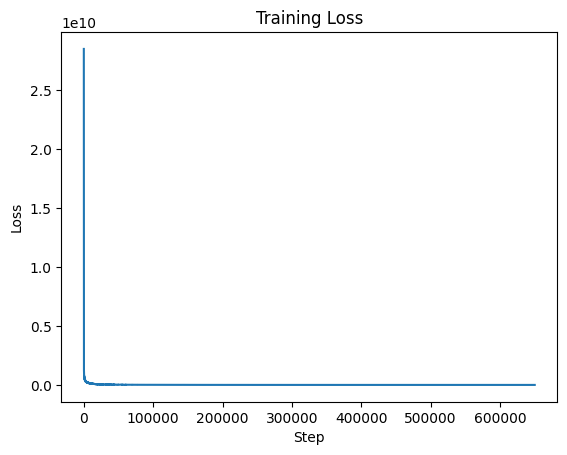

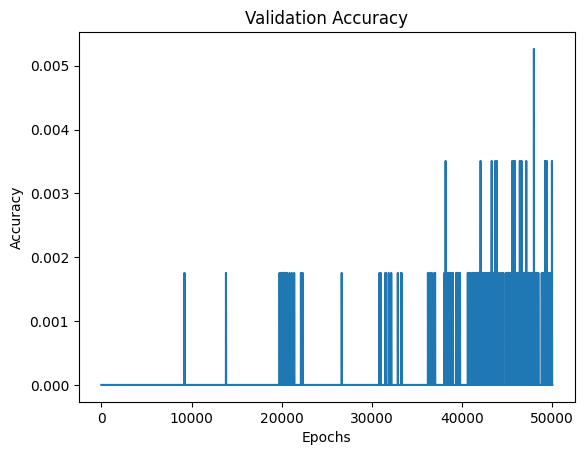

Plotting reverse with 25000...


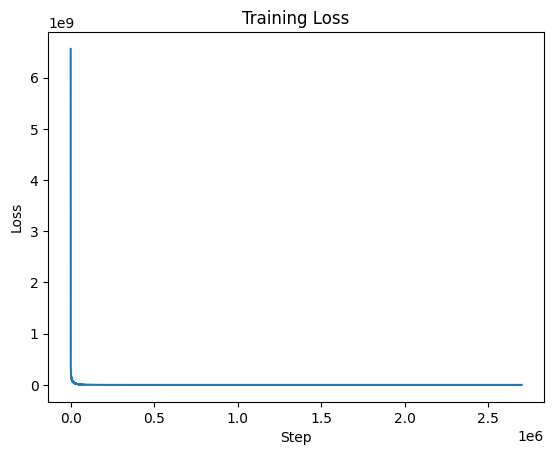

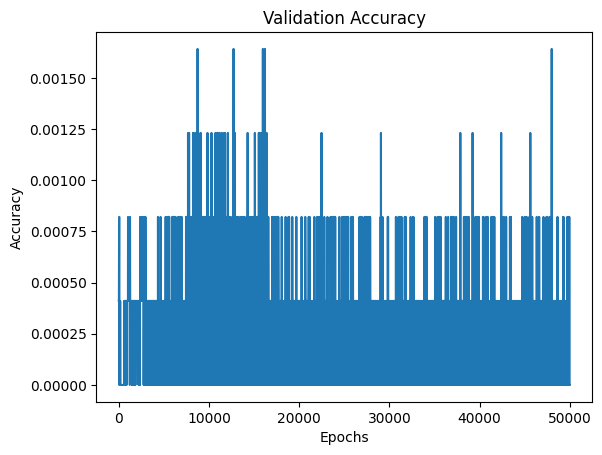

Plotting reverse with 50000...


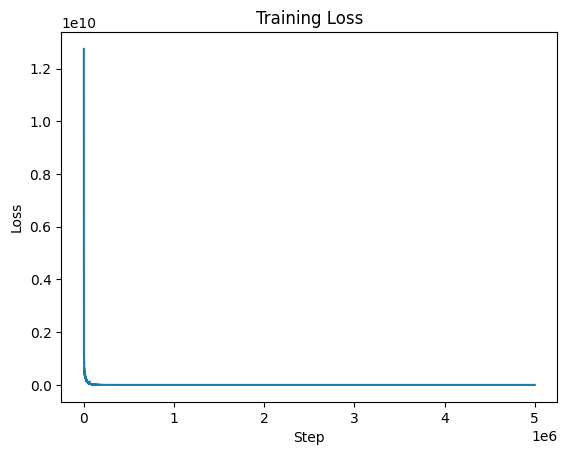

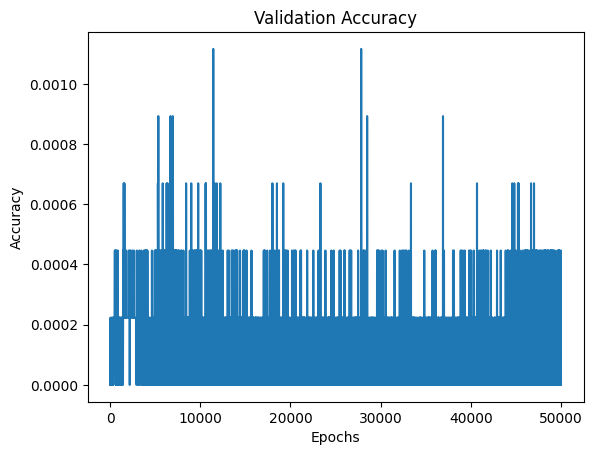

Plotting reverse with 100000...
Plotting hist with 5000...


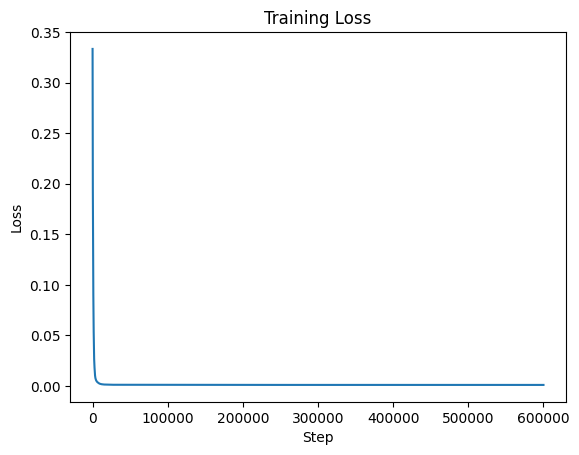

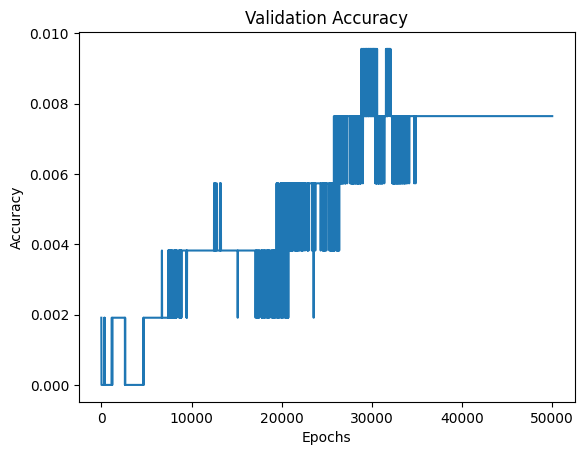

Plotting hist with 25000...


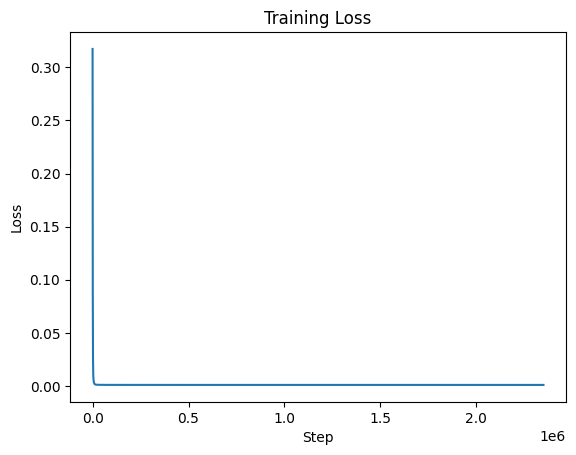

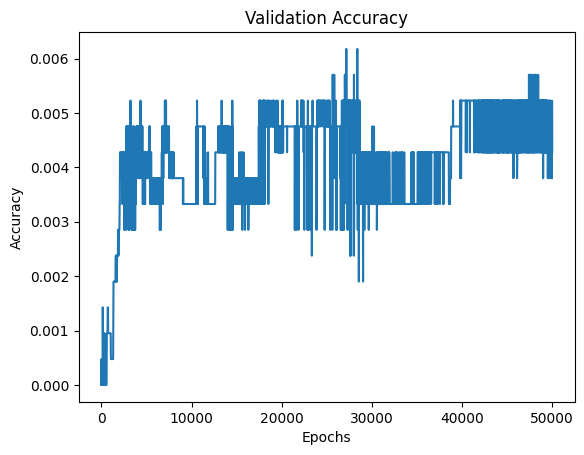

Plotting hist with 50000...


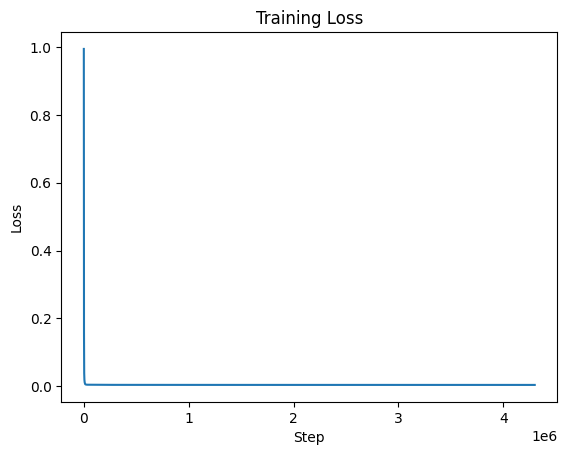

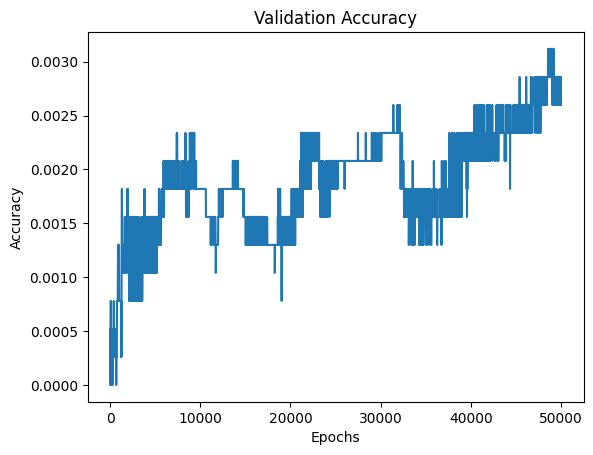

Plotting hist with 100000...


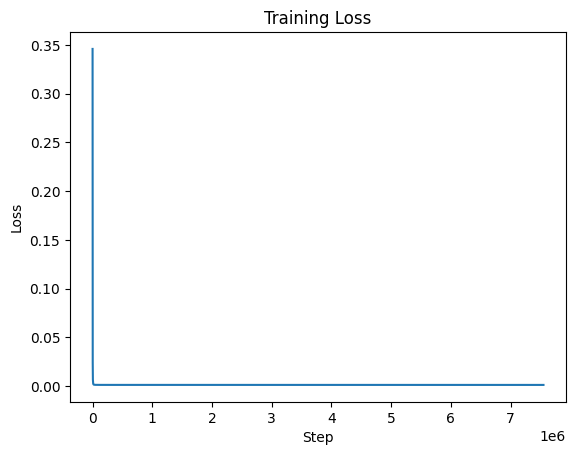

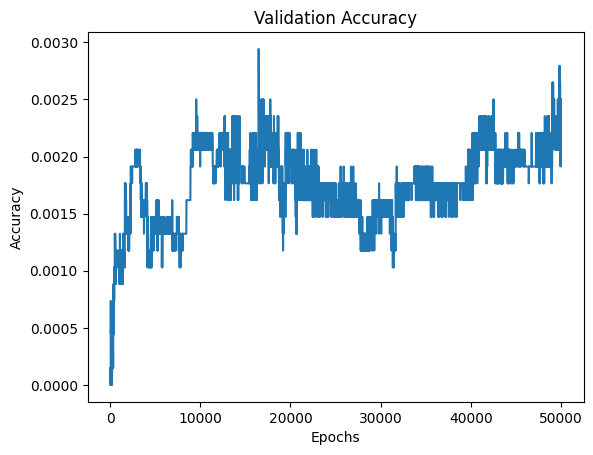

Plotting sort with 5000...


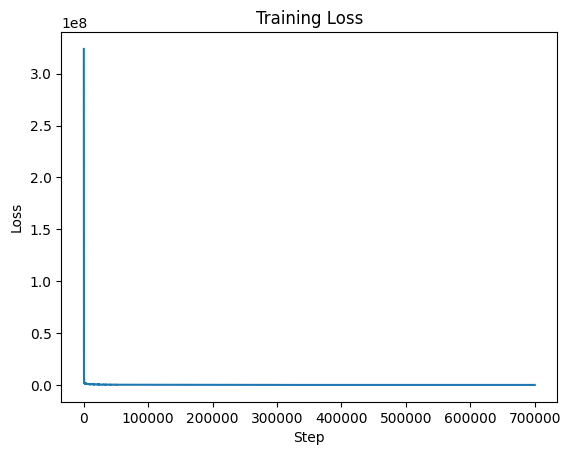

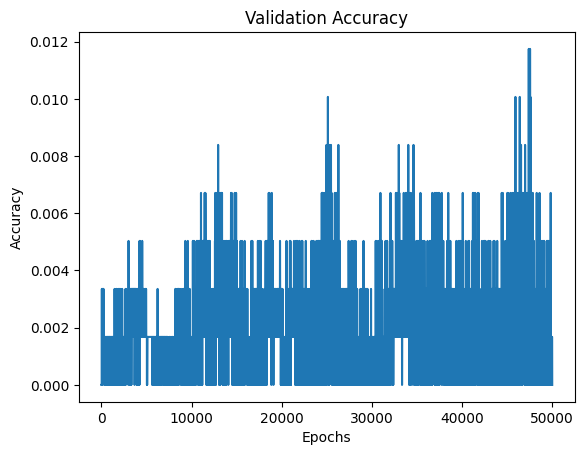

Plotting sort with 25000...


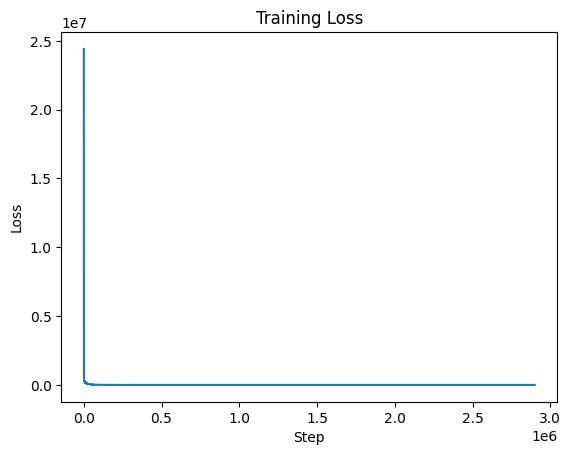

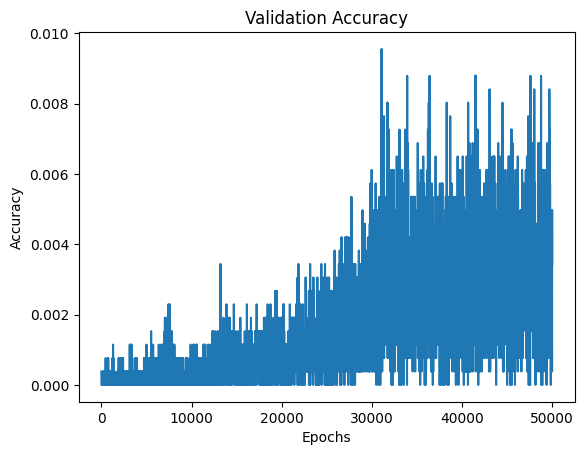

Plotting sort with 50000...


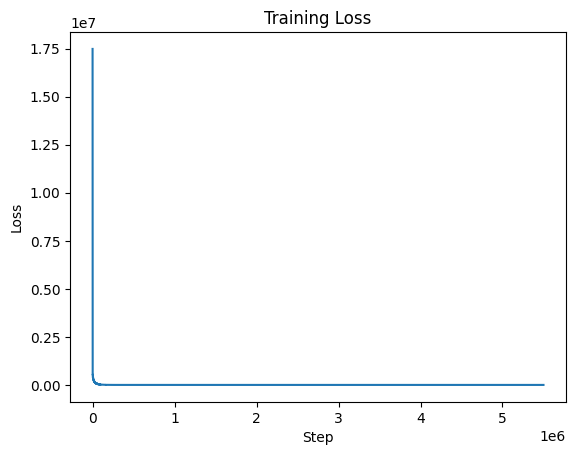

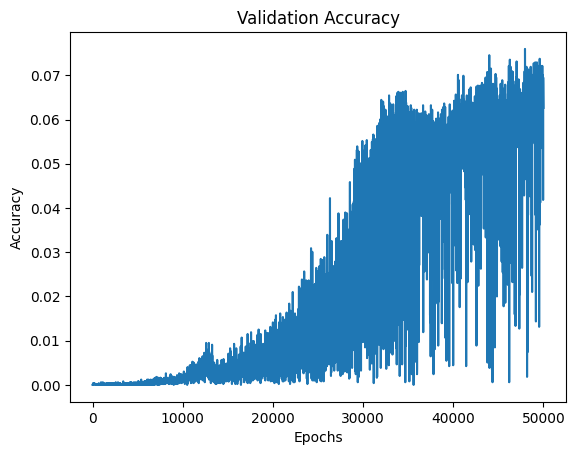

Plotting sort with 100000...


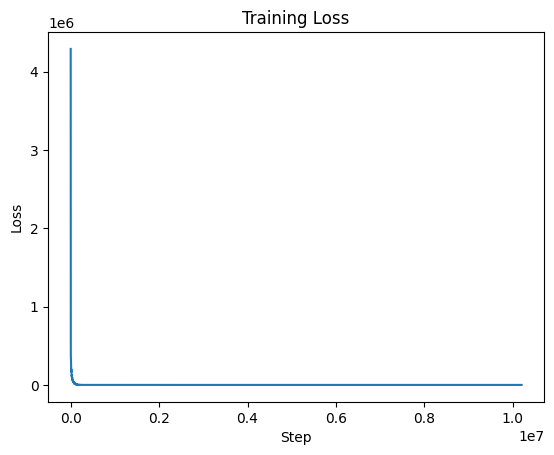

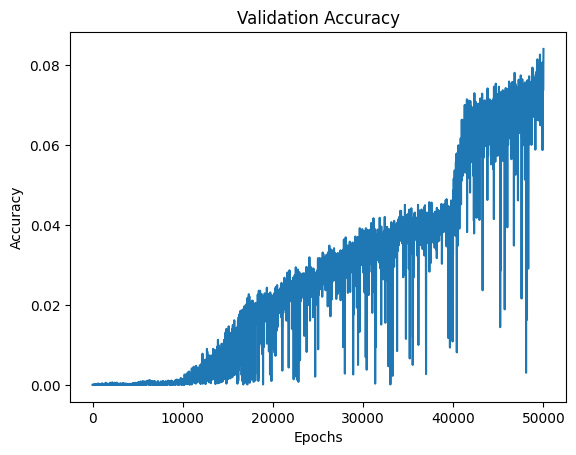

Plotting most-freq with 5000...


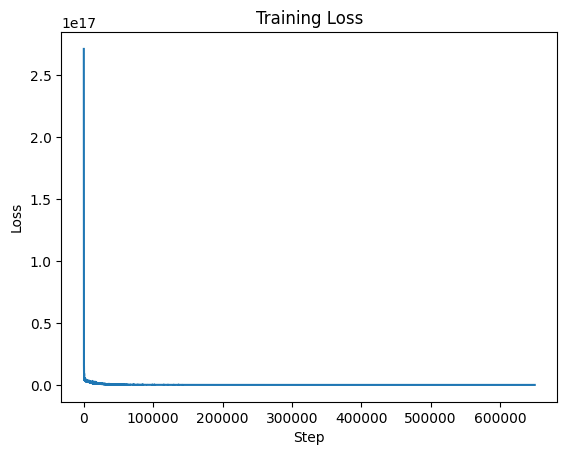

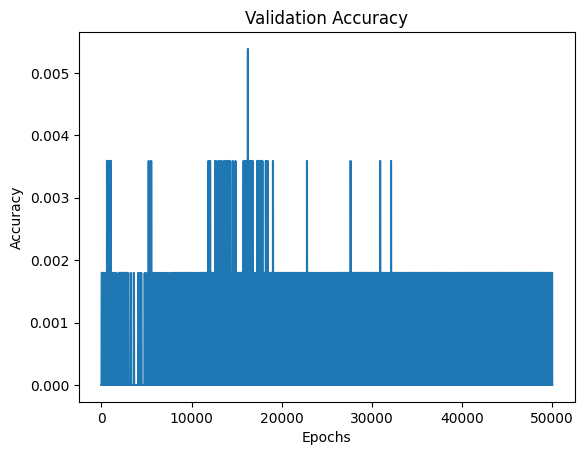

Plotting most-freq with 25000...


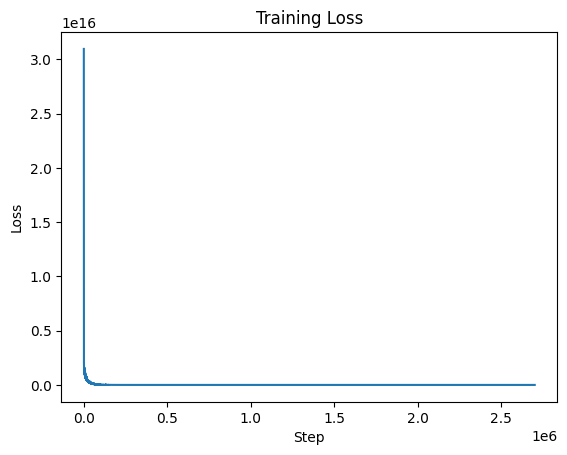

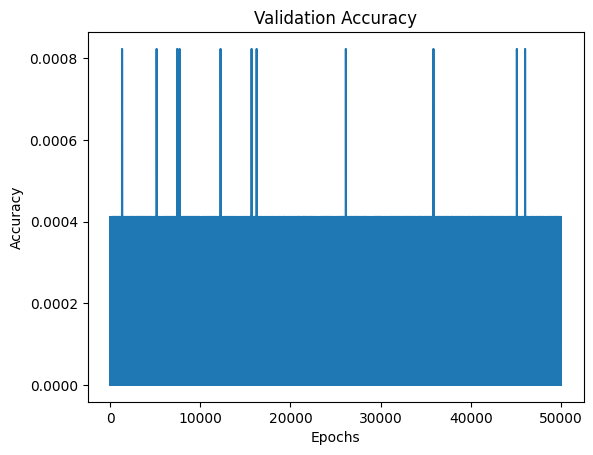

Plotting most-freq with 50000...
Plotting most-freq with 100000...
Plotting shuffle_dyck1 with 5000...


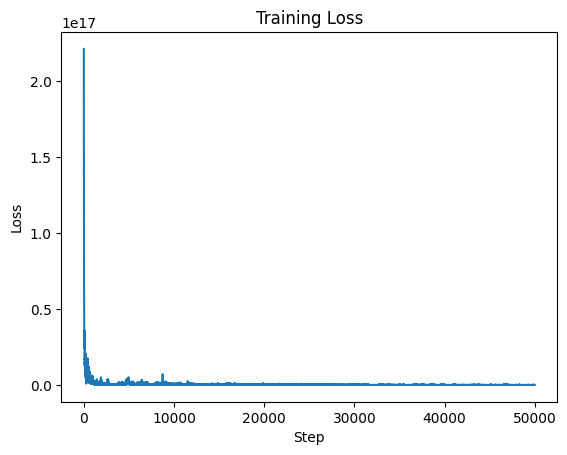

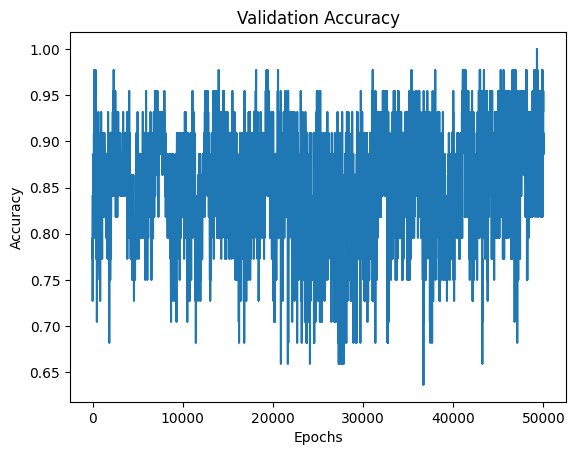

Plotting shuffle_dyck1 with 25000...


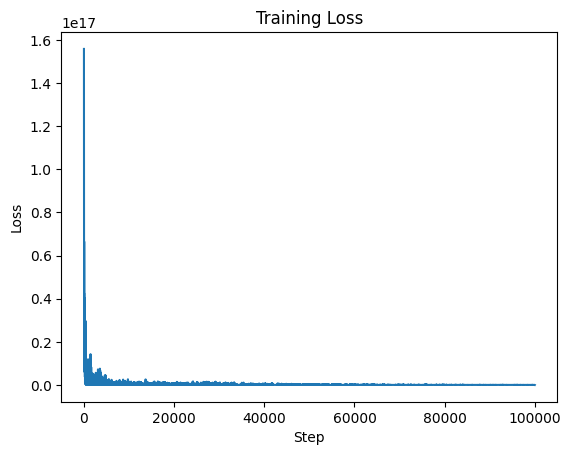

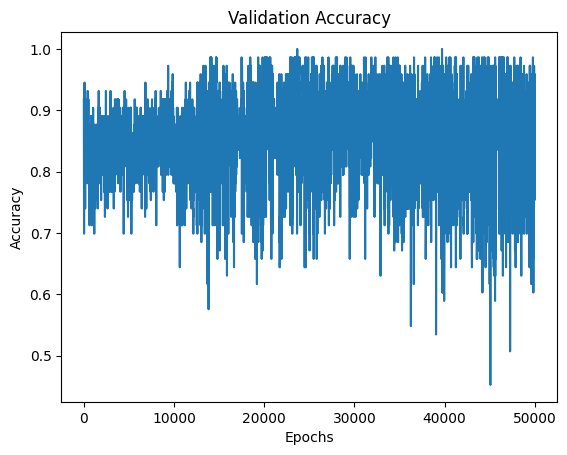

Plotting shuffle_dyck1 with 50000...


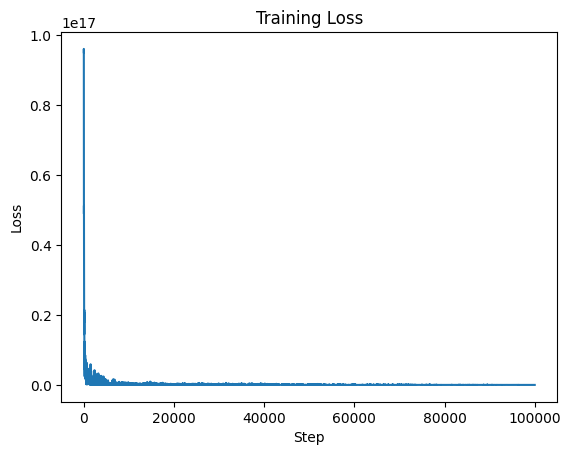

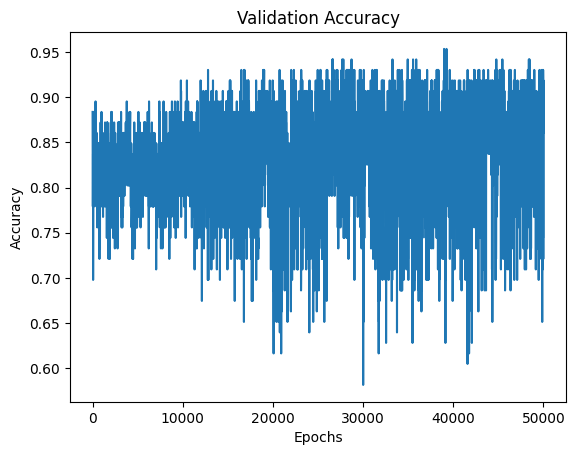

Plotting shuffle_dyck1 with 100000...


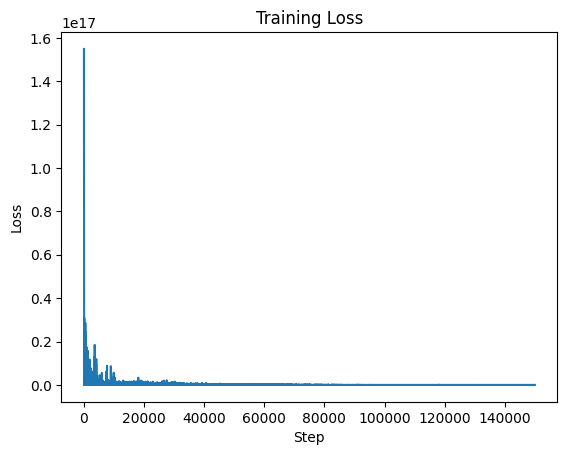

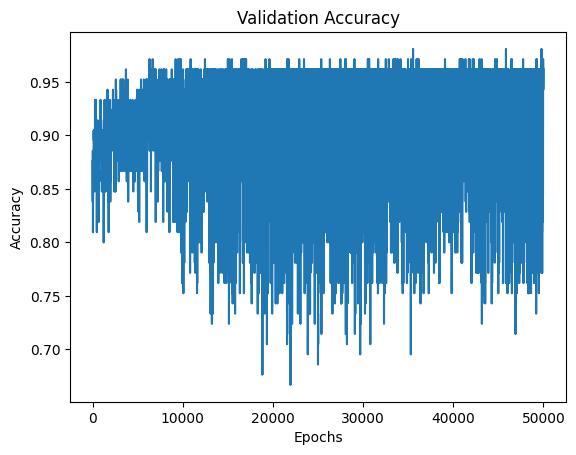

Plotting shuffle_dyck2 with 5000...


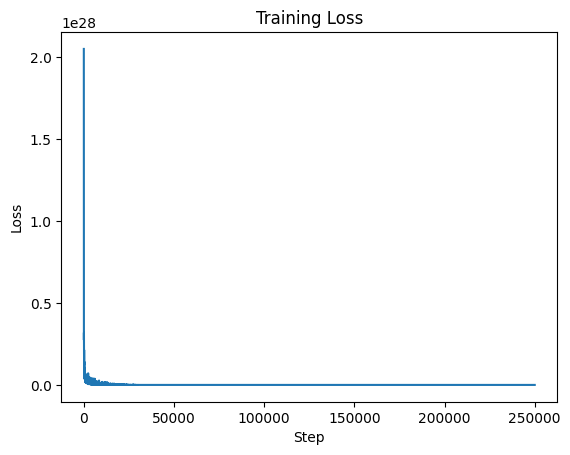

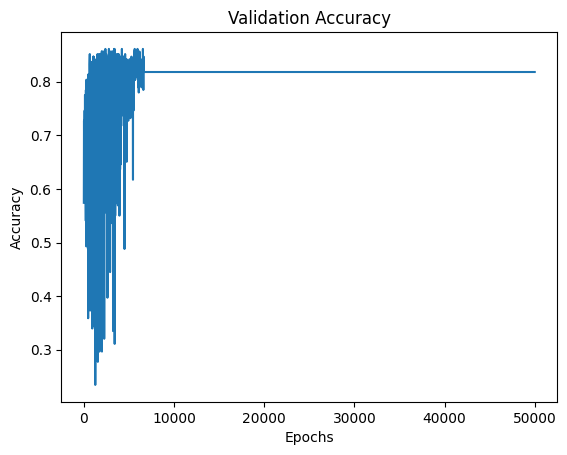

Plotting shuffle_dyck2 with 25000...


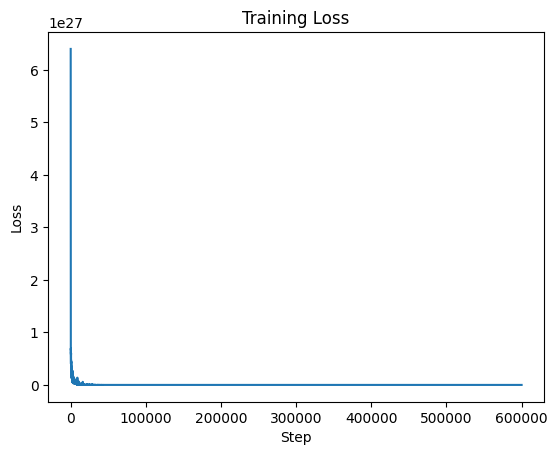

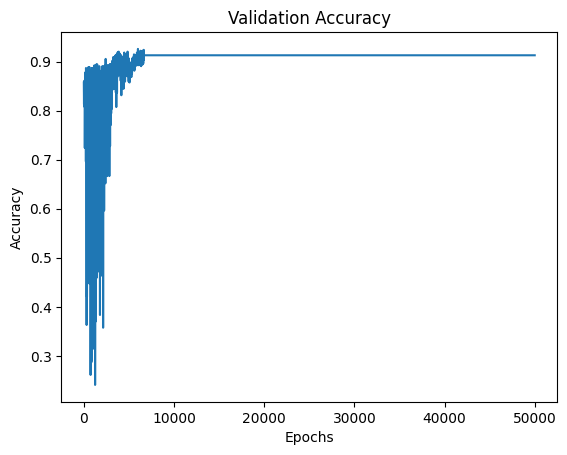

Plotting shuffle_dyck2 with 50000...


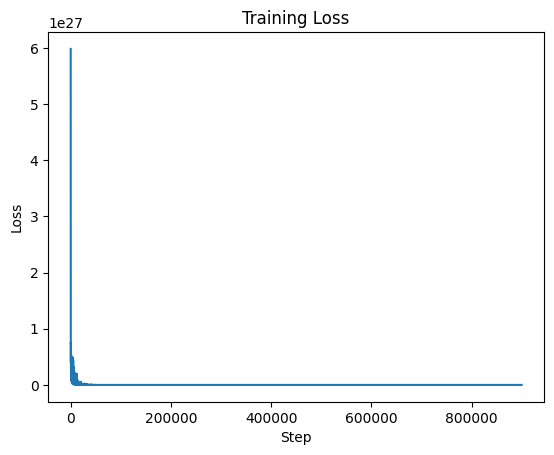

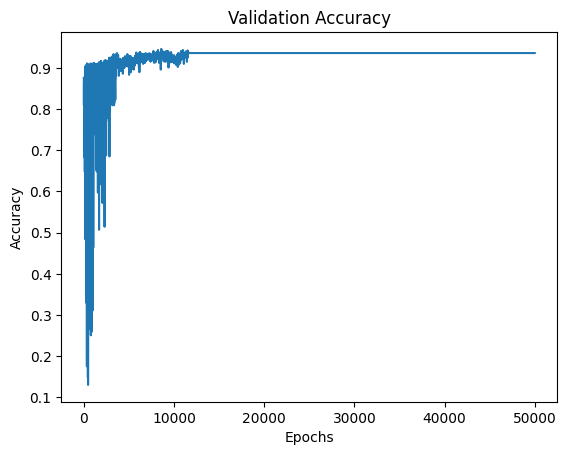

Plotting shuffle_dyck2 with 100000...


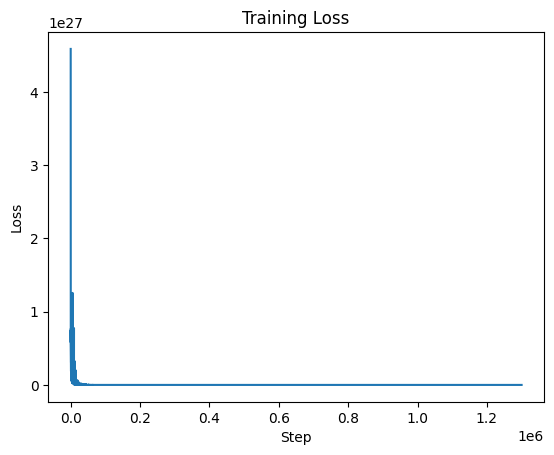

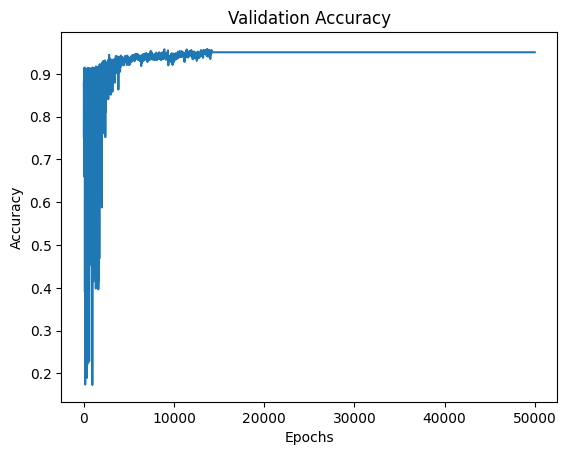

In [3]:
for model_name in getAcceptedNamesAndInput().keys():
    for n_samples in [5000, 25000, 50000, 100000]:
        print(f"Plotting {model_name} with {n_samples}...")
        try:
            plot_results(model_name, n_samples)
        except:
            pass